In [1]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib as plt
import spacy

# Get the data and check it

In [2]:
unpickled_df = pd.read_pickle("C:/Users/USER/Documents/Python/NLP/extracted_data.pkl")

In [3]:
#unpickled_df

* Take out the nan values

In [4]:
df = unpickled_df[unpickled_df['description'].notna()]
#df

# Corpus warm-up:
* Create the corpus of abstracts

In [5]:
corpus = df["description"].tolist()

In [6]:
#check how some values look like
#corpus[0], corpus[1010], corpus[2]

In [7]:
#type(corpus[0])

In [8]:
#len(corpus)
#1028 abstracts

In [9]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', corpus[i])
    corpus_all.extend(res)
    
#corpus_all

In [10]:
#len(corpus_all)

In [11]:
#type(corpus_all)

In [12]:
#print(corpus_all)

* Create a list all the unique words in the corpus

In [13]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 17950 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

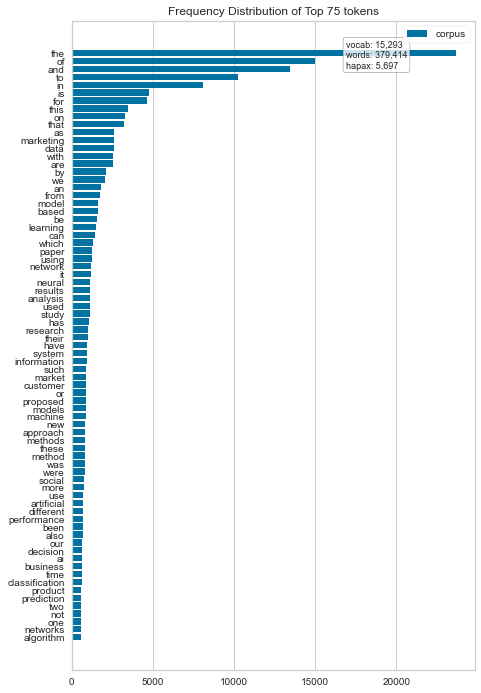

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [14]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

### Take out english stopwords and check which are the most used words

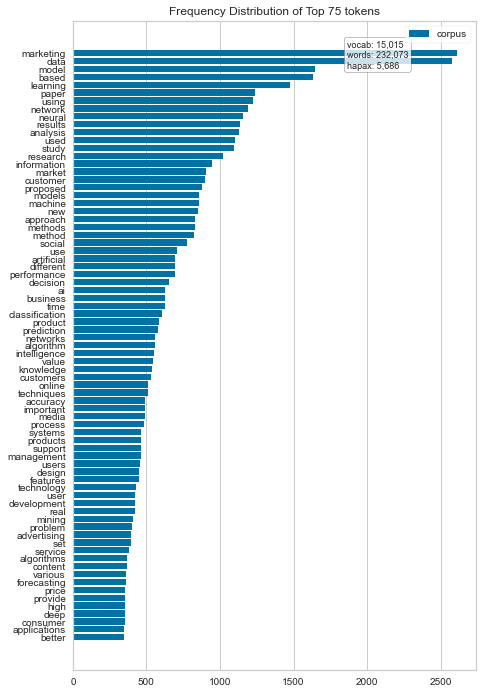

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [15]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

In [16]:
#from sklearn.feature_extraction import stop_words


* Check the most popular words only for some years

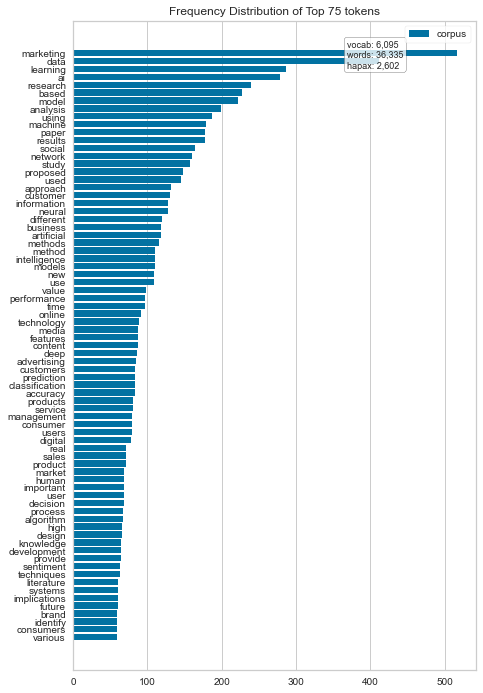

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [17]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus[200:500])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

### Lemmatizing

In [18]:
import spacy
spacyen = spacy.load('en_core_web_sm')

In [19]:
corpus_all_lower = []

for each in corpus_all:
    each = each.lower().split()
    corpus_all_lower.extend(each)
    
#corpus_all_lower 

In [20]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus_all_lower_lemma =[]    
    
for each1 in corpus_all_lower:
    each1 = lemmatizer.lemmatize(each1)
    corpus_all_lower_lemma.extend(each1)
    
#corpus_all_lower_lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
    
len(corpus_all_lower_lemma)

2134219

## Divide corpus into sentences

In [22]:
corpus[0]

'Facebook’s utilisation of machine learning and artificial intelligence (AI) can often identify profitable targets more quickly and more effectively than can human campaign managers. However, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their Facebook Ad campaigns and leveraging the power of Facebook’s machine learning and AI capabilities. This article discusses the some of the issues that marketers face in trying to fully utilise Facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on Facebook. This article will detail a few of these frameworks, strategies and tactics. The article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.'

In [23]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['Facebook’s utilisation of machine learning and artificial intelligence (AI) can often identify profitable targets more quickly and more effectively than can human campaign manage',
 'However, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their Facebook Ad campaigns and leveraging the power of Facebook’s machine learning and AI capabiliti',
 'This article discusses the some of the issues that marketers face in trying to fully utilise Facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on Facebo',
 'This article will detail a few of these frameworks, strategies and tacti',
 'The article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.']

In [24]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

5

In [25]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [26]:
df.loc[:,'nr_sentences_abstract']=corpus_sentences

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
df.nr_sentences_abstract.describe()

count    2048.000000
mean        8.289062
std         3.551345
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        46.000000
Name: nr_sentences_abstract, dtype: float64

In [29]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())

In [30]:
 #print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [31]:
df.loc[df['nr_sentences_abstract'] == 46]['description']

2581    Subject area: PT. Bank Central Asia, Tbk. (BCA...
Name: description, dtype: object

In [32]:
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

In [33]:
#We should also extract the keywords maybe

In [34]:
keywords = df["authkeywords"].tolist()

In [35]:
keywords[1]

'Creativity | Marketing 3.0 | Marketing 4.0 | Marketing intelligence | Paradigm | Performance marketing'

In [36]:
keywords_all = []

for i in range(0, len(keywords)):
    res = re.findall(r'\w+[a-zA-Z][ ][|]', str(keywords[i]))
    keywords_all.extend(res)
    
#keywords_all

## Heap's law and Zipf's Law

### Naive tokenization

## Word cloud


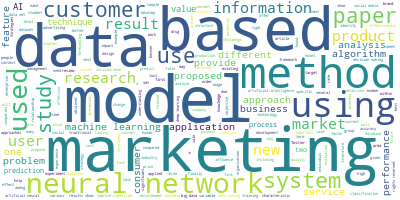

In [37]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

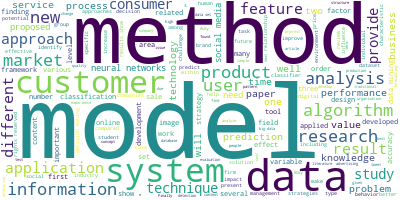

In [38]:
#This is the wordcloud without the keywords

REMOVE_LIST = ["artificial intelligence", "artifical", "intelligence", "machine", "learning", "machine learning",
              "marketing", "deep learning", "deep", "learning", "neural network", "nueral", "network", "AI", "based", "using",
              "used", "use"]

REMOVE_LIST = STOPWORDS.union(REMOVE_LIST)

remove = '|'.join(REMOVE_LIST)
    
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

out1= [regex.sub("", str(x)) for x in df['description']]

#print(out1[1])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

out = ','.join(list(out1))

wordcloud.generate(out)

wordcloud.to_image()

# LDA

In [93]:
import gensim

from gensim.utils import simple_preprocess

out1 = df['description'].values

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in STOPWORDS] for doc in texts]

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])




C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

#print(corpus[:1][0][:30])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
from pprint import pprint

num_topics = 20

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model.save('lda_model.model')

print(lda_model.print_topics(20, num_words = 5))

doc_lda = lda_model[corpus]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.047*"drug" + 0.021*"drugs" + 0.020*"health" + 0.017*"safety" + 0.016*"adverse"'), (1, '0.045*"social" + 0.031*"media" + 0.018*"content" + 0.017*"twitter" + 0.012*"tweets"'), (2, '0.012*"study" + 0.010*"variables" + 0.009*"model" + 0.007*"purchase" + 0.007*"intention"'), (3, '0.008*"marketing" + 0.007*"location" + 0.007*"people" + 0.007*"internet" + 0.007*"services"'), (4, '0.027*"model" + 0.024*"neural" + 0.022*"market" + 0.021*"network" + 0.020*"forecasting"'), (5, '0.101*"ai" + 0.014*"intelligence" + 0.012*"technology" + 0.011*"artificial" + 0.009*"technologies"'), (6, '0.010*"uplift" + 0.007*"kernels" + 0.007*"collaborative" + 0.006*"churn" + 0.006*"recommendation"'), (7, '0.030*"tourism" + 0.015*"yield" + 0.013*"crm" + 0.012*"hotel" + 0.012*"travel"'), (8, '0.019*"data" + 0.015*"model" + 0.015*"network" + 0.014*"neural" + 0.011*"based"'), (9, '0.017*"models" + 0.013*"accuracy" + 0.012*"machine" + 0.012*"classification" + 0.011*"regression"')]


In [42]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))




2048


In [43]:
df.citedby_count.describe()

df['y']=df.citedby_count>4
#print(df['y'])

df['year'] = df['coverDate'].astype(str).str[0:4]

df['year'] = df['year'].astype(int)

df.loc[df['year'] <2000,'coverDate'] = 0

df.loc[df['year'] > 2010,'coverDate'] = 2

df.loc[(df['year']>=2000) & (df['year'] <= 2010) ,'coverDate'] = 1
#a = np.array(df.coverDate.values.tolist())
#df['coverDate'] = np.where(a < '2000-1-1', 0, a).tolist()
#year

<ipython-input-43-c4f30bbbc13f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df.citedby_count>4
<ipython-input-43-c4f30bbbc13f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['coverDate'].astype(str).str[0:4]
<ipython-input-43-c4f30bbbc13f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

## This cell tries interaction term - I am still figuring it out.

## Logistic Regression - Still need to add the sentiments
### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 
### y: citation number

In [45]:
#logistic regression - unigram
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

X = np.array(train_vecs, df.coverDate)
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'newton-cg',
        fit_intercept = True,
        max_iter = 3000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=3000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=3000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.548 +- 0.059
Logisitic Regression SGD Val f1: 0.544 +- 0.055
SVM Huber Val f1: 0.129 +- 0.258


In [46]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

In [47]:
#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

# We can also run HDP, which seeks to learn the correct number of topics
# from the data, that is, you don't need to provide a fixed number of topics.
# In the end, we expect to run a basic logistic regression - to be done later



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA over time

### Firstly, we divide the data in 3 windows (~2000, ~2010 ~2020)

In [77]:
#~2000

from pprint import pprint

num_topics = 20

inc = df.coverDate == 0
inc.astype(int)

corpus0 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model0 = gensim.models.LdaMulticore(corpus = corpus0, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model0.save('lda_model0.model')

print(lda_model0.print_topics(20, num_words = 15)[:10])

doc_lda0 = lda_model0[corpus0]

train_vecs0 = []
for i in range(len(corpus0)):
    top_topics0 = (
        lda_model0.get_document_topics(corpus0[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec0 = [top_topics0[i][1] for i in range(20)]
    train_vecs0.append(topic_vec0)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


205


In [81]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')

print(lda_model1.print_topics(20, num_words = 15)[:10])

doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')



doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.019*"data" + 0.009*"knowledge" + 0.009*"mining" + 0.008*"new" + 0.005*"method" + 0.005*"bayesian" + 0.005*"approach" + 0.005*"paper" + 0.005*"customers" + 0.004*"problem" + 0.004*"information" + 0.004*"networks" + 0.004*"two" + 0.004*"algorithm" + 0.003*"decision"'), (1, '0.013*"model" + 0.010*"networks" + 0.009*"stock" + 0.008*"neural" + 0.008*"market" + 0.007*"value" + 0.006*"logistics" + 0.006*"data" + 0.006*"models" + 0.006*"decision" + 0.006*"artificial" + 0.005*"analysis" + 0.004*"paper" + 0.004*"creation" + 0.004*"research"'), (2, '0.009*"data" + 0.007*"new" + 0.007*"product" + 0.006*"model" + 0.006*"strategy" + 0.006*"market" + 0.005*"information" + 0.005*"paper" + 0.005*"customer" + 0.005*"algorithm" + 0.005*"different" + 0.004*"markets" + 0.004*"development" + 0.004*"system" + 0.004*"study"'), (3, '0.012*"market" + 0.011*"model" + 0.010*"models" + 0.009*"method" + 0.008*"research" + 0.008*"paper" + 0.008*"prediction" + 0.007*"time" + 0.006*"methods" + 0.006*"fuzzy" + 

In [49]:
'''
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model0, corpus0, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-49-94d9b67b8bd6>, line 20)

In [92]:
print(lda_model1.print_topics(20, num_words = 5))

[(0, '0.019*"data" + 0.009*"knowledge" + 0.009*"mining" + 0.008*"new" + 0.005*"method"'), (1, '0.013*"model" + 0.010*"networks" + 0.009*"stock" + 0.008*"neural" + 0.008*"market"'), (2, '0.009*"data" + 0.007*"new" + 0.007*"product" + 0.006*"model" + 0.006*"strategy"'), (3, '0.012*"market" + 0.011*"model" + 0.010*"models" + 0.009*"method" + 0.008*"research"'), (4, '0.016*"data" + 0.010*"system" + 0.009*"method" + 0.008*"market" + 0.008*"proposed"'), (5, '0.016*"customer" + 0.013*"data" + 0.009*"drug" + 0.007*"information" + 0.006*"customers"'), (6, '0.008*"choice" + 0.008*"models" + 0.008*"utility" + 0.007*"model" + 0.007*"neural"'), (7, '0.011*"market" + 0.010*"model" + 0.007*"data" + 0.005*"system" + 0.005*"methods"'), (8, '0.008*"model" + 0.006*"recommendation" + 0.006*"business" + 0.006*"information" + 0.005*"systems"'), (9, '0.011*"decision" + 0.008*"networks" + 0.007*"models" + 0.006*"neural" + 0.006*"data"'), (10, '0.013*"model" + 0.010*"models" + 0.008*"gas" + 0.007*"price" + 0.0

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
